In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [28]:
#Charge the dataframe of the bootstrap samples
resultado=pd.read_csv('bootstrap_muestras.csv')
resultado=resultado.sort_values(by='area')

In [29]:
#Print it
resultado.head(1)

,Unnamed: 0,area,n_muestras,mean_generos,std_generos
6662,43,1,1191,166.516,11.112234


In [30]:
areas=resultado['area'].unique()

In [31]:
areas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 56, 59, 60, 61,
       62, 63, 64, 66], dtype=int64)

In [7]:
#For each area, it charges the result, it combines all the dataframes in an unique one
frames=[]
for area in areas:
    data=pd.read_csv(f'bootstrap_muestras_{int(area)}.csv')
    frames.append(data)

result=pd.concat(frames)

FileNotFoundError: [Errno 2] No such file or directory: 'bootstrap_muestras_47.csv'

In [8]:
areas

array([47, 36, 45, 44, 46, 48, 40, 42, 37, 43, 39, 35, 38, 34, 33, 32, 28,
       31, 26, 29, 27, 22, 25, 17, 21, 15, 10, 20, 18, 19, 13, 16,  7, 12,
       14,  8,  9,  5,  6,  4,  2, 59,  3, 62, 60,  1, 61, 52, 50, 66, 53,
       54, 63, 56, 64], dtype=int64)

In [27]:
resultado.head(1)

,Unnamed: 0,area,n_muestras,mean_generos,std_generos
0,0,47,1,2.55,2.824447


In [24]:
resultado

KeyboardInterrupt: 

In [7]:
result=resultado.sort_values(by=['area','n_muestras'])

In [8]:
result=result.reset_index(drop=True)

In [11]:
pd.set_option('display.max_rows', None)

print(result[result["area"]==1]["mean_generos"])


6619      4.540
6745     27.708
6746     38.456
6747     46.164
6748     52.148
6749     56.490
6750     60.968
6751     64.022
6752     67.196
6753     70.582
6754     73.692
6755     75.816
6756     78.292
6757     80.168
6758     82.868
6759     84.558
6760     86.566
6761     88.818
6762     90.236
6763     91.864
6764     93.904
6765     95.716
6744     97.030
6766     98.842
6743    100.758
6741    100.964
6720    102.774
6721    104.100
6722    105.320
6723    106.128
6724    107.654
6725    108.802
6726    109.774
6727    111.064
6728    112.202
6729    114.328
6730    114.642
6731    115.806
6732    117.020
6733    117.594
6734    119.090
6735    119.836
6736    120.394
6737    121.956
6738    121.886
6739    123.308
6740    123.470
6742    124.752
6767    125.958
6768    125.858
6769    126.966
6795    129.146
6796    129.316
6797    130.260
6798    130.574
6799    132.050
6800    132.792
6801    133.002
6802    133.310
6803    134.966
6804    134.932
6806    135.576
6817    

In [30]:
result

<bound method DataFrame.reset_index of      area  n_muestras  mean_generos  std_generos
0       1           1         4.540     3.556459
126     1          11        27.708     7.084824
127     1          21        38.456     7.947834
128     1          31        46.164     8.254763
129     1          41        52.148     8.214505
..    ...         ...           ...          ...
29     66         991       333.480     2.658872
28     66        1001       334.250     2.029162
27     66        1011       335.220     1.628373
102    66        1021       335.970     1.503030
103    66        1031       336.800     0.509902

[8084 rows x 4 columns]>

In [ ]:
#Save the result to a new CSV file
result.to_csv('bootstrap_muestras.csv')

In [15]:
result=pd.read_csv('bootstrap_muestras.csv')

In [16]:
#It extracts the areas, means, standard deviations and number of samples. They are not separated by the area, we are going to do it
areas_generos=result['area']
mean=result['mean_generos']
std=result['std_generos']
num_muestra=result['n_muestras']

In [17]:
#We visualize if it is done correctly
areas_generos[1]

47

In [53]:
#We create lists to store the means, standard deviations and number of samples for each area
mean_generos=[[]for k in range(67)]
std_generos=[[]for k in range(67)]
n_muestra=[[]for k in range(67)]

In [54]:
result

,Unnamed: 0,area,n_muestras,mean_generos,std_generos
0,0,47,1,2.550,2.824447
1,1,47,1271,519.515,20.805523
2,2,47,1281,524.850,20.003187
3,3,47,1291,526.290,20.213755
4,4,47,1301,528.405,20.081608
...,...,...,...,...,...
8079,62,64,281,165.884,7.174716
8080,63,64,291,167.952,6.997121
8081,64,64,301,169.311,6.975405
8082,65,64,161,141.437,8.575548


In [55]:
#Fore each area, we append the means, standard deviations and number of samples to the corresponding list
for k in range(len(result)):
    mean_generos[areas_generos[k]].append(mean[k])
    std_generos[areas_generos[k]].append(std[k])
    n_muestra[areas_generos[k]].append(num_muestra[k])
    

In [61]:
#We save in a vector the last standard deviation of each area
last_std = [v[-1] for v in std_generos if len(v) > 0]

In [ ]:
#We check if it has the correct length
len(last_std)

55

In [ ]:
#We create a new dataframe in which one column correspond to each area
tabla = pd.DataFrame({
    'Numero de Muestra': n_muestra[1],
    'Área 1': pd.Series(mean_generos[1]),
    'Área 2': pd.Series(mean_generos[2]),
    'Área 3': pd.Series(mean_generos[3]),
    'Área 4': pd.Series(mean_generos[4]),
    'Área 5': pd.Series(mean_generos[5]),
    'Área 6': pd.Series(mean_generos[6]),
    'Área 7': pd.Series(mean_generos[7]),
    'Área 8': pd.Series(mean_generos[8]),
    'Área 9': pd.Series(mean_generos[9]),
    'Área 10': pd.Series(mean_generos[10]),
    'Área 12': pd.Series(mean_generos[12]),
    'Área 13': pd.Series(mean_generos[13]),
    'Área 14': pd.Series(mean_generos[14]),
    'Área 15': pd.Series(mean_generos[15]),
    'Área 16': pd.Series(mean_generos[16]),
    'Área 17': pd.Series(mean_generos[17]),
    'Área 18': pd.Series(mean_generos[18]),
    'Área 19': pd.Series(mean_generos[19]),
    'Área 20': pd.Series(mean_generos[20]),
    'Área 21': pd.Series(mean_generos[21]),
    'Área 22': pd.Series(mean_generos[22]),
    'Área 25': pd.Series(mean_generos[25]),
    'Área 26': pd.Series(mean_generos[26]),
    'Área 27': pd.Series(mean_generos[27]),
    'Área 28': pd.Series(mean_generos[28]),
    'Área 29': pd.Series(mean_generos[29]),
    'Área 31': pd.Series(mean_generos[31]),
    'Área 32': pd.Series(mean_generos[32]),
    'Área 33': pd.Series(mean_generos[33]),
    'Área 34': pd.Series(mean_generos[34]),
    'Área 35': pd.Series(mean_generos[35]),
    'Área 36': pd.Series(mean_generos[36]),
    'Área 37': pd.Series(mean_generos[37]),
    'Área 38': pd.Series(mean_generos[38]),
    'Área 39': pd.Series(mean_generos[39]),
    'Área 40': pd.Series(mean_generos[40]),
    'Área 42': pd.Series(mean_generos[42]),
    'Área 43': pd.Series(mean_generos[43]),
    'Área 44': pd.Series(mean_generos[44]),
    'Área 45': pd.Series(mean_generos[45]),
    'Área 46': pd.Series(mean_generos[46]),
    'Área 47': pd.Series(mean_generos[47]),
    'Área 48': pd.Series(mean_generos[48]),
    'Área 50': pd.Series(mean_generos[50]),
    'Área 51': pd.Series(mean_generos[51]),
    'Área 52': pd.Series(mean_generos[52]),
    'Área 53': pd.Series(mean_generos[53]),
    'Área 54': pd.Series(mean_generos[54]),
    'Área 56': pd.Series(mean_generos[56]),
    'Área 59': pd.Series(mean_generos[59]),
    'Área 60': pd.Series(mean_generos[60]),
    'Área 61': pd.Series(mean_generos[61]),
    'Área 62': pd.Series(mean_generos[62]),
    'Área 63': pd.Series(mean_generos[63]),
    'Área 64': pd.Series(mean_generos[64]),
    'Área 66': pd.Series(mean_generos[66]), 
})#pd.Series)(

In [ ]:
#We visualize the first columns
tabla.tail(10)

,Numero de Muestra,Área 1,Área 2,Área 3,Área 4,Área 5,Área 6,Área 7,Área 8,Área 9,...,Área 53,Área 54,Área 56,Área 59,Área 60,Área 61,Área 62,Área 63,Área 64,Área 66
190,1901,191.712,NaN,536.057,583.270,244.062,661.028,NaN,NaN,140.415,...,499.006,581.150,NaN,NaN,333.140,388.140,NaN,NaN,NaN,NaN
191,1911,190.814,NaN,536.221,584.495,244.860,666.074,NaN,NaN,141.345,...,500.126,581.785,NaN,NaN,334.990,388.455,NaN,NaN,NaN,NaN
192,1921,191.556,NaN,536.951,588.010,245.142,668.502,NaN,NaN,140.555,...,500.000,583.895,NaN,NaN,336.272,389.520,NaN,NaN,NaN,NaN
193,1931,191.918,NaN,539.778,587.965,245.868,665.892,NaN,NaN,138.810,...,502.546,585.670,NaN,NaN,335.962,388.535,NaN,NaN,NaN,NaN
194,1941,192.694,NaN,538.256,588.925,244.394,667.314,NaN,NaN,142.905,...,501.760,585.095,NaN,NaN,336.624,390.080,NaN,NaN,NaN,NaN
195,1951,192.532,NaN,540.261,586.930,245.882,673.212,NaN,NaN,141.855,...,502.240,585.375,NaN,NaN,336.836,391.200,NaN,NaN,NaN,NaN
196,1961,193.090,NaN,539.858,591.040,245.548,669.394,NaN,NaN,145.025,...,502.980,585.685,NaN,NaN,337.448,391.010,NaN,NaN,NaN,NaN
197,1971,192.860,NaN,541.616,591.300,245.564,668.608,NaN,NaN,141.455,...,504.146,586.340,NaN,NaN,338.078,391.440,NaN,NaN,NaN,NaN
198,1981,194.144,NaN,542.778,593.760,245.922,671.248,NaN,NaN,142.460,...,504.714,586.380,NaN,NaN,338.680,392.080,NaN,NaN,NaN,NaN
199,1991,193.866,NaN,543.275,593.785,246.256,671.788,NaN,NaN,143.000,...,504.270,587.540,NaN,NaN,339.724,392.520,NaN,NaN,NaN,NaN


In [ ]:
#We save the table in a CSV file
tabla.to_csv('tabla_bootstrap_muestras.csv', index=False)

In [25]:
mean_generos[14]

[7.082,
 44.802,
 65.602,
 83.594,
 95.684,
 108.506,
 119.362,
 126.788,
 136.572,
 143.316,
 154.97,
 161.212,
 169.9,
 173.34,
 181.164,
 185.662,
 192.814,
 202.466,
 206.102,
 211.546,
 216.552,
 218.65,
 221.884,
 233.394,
 232.88,
 238.108,
 243.898,
 246.864,
 251.95,
 254.91,
 260.588,
 262.522,
 265.526,
 273.722,
 274.34,
 276.01,
 279.246,
 288.394,
 289.07,
 290.61,
 297.7,
 300.204,
 298.548,
 306.846,
 305.454,
 311.172,
 315.688,
 315.516,
 320.856,
 320.308,
 326.434,
 329.174,
 330.11,
 337.178,
 339.298,
 340.804,
 340.054,
 346.588,
 344.05,
 348.02,
 349.74,
 355.822,
 358.008,
 361.09,
 359.106,
 365.436,
 365.478,
 371.87,
 375.34,
 375.554,
 377.292,
 378.102,
 379.592,
 388.68,
 391.214,
 388.036,
 392.616,
 395.876,
 394.126,
 397.484,
 401.756,
 396.58,
 404.176,
 405.088,
 406.156,
 413.21,
 412.232,
 414.542,
 413.362,
 417.592,
 421.242,
 418.67,
 422.494,
 426.236,
 423.964,
 426.302,
 428.738,
 428.222,
 431.882,
 435.934,
 439.49,
 440.848,
 443.272,
 4

Text(0.5, 1.0, 'Número de géneros por muestra por área')

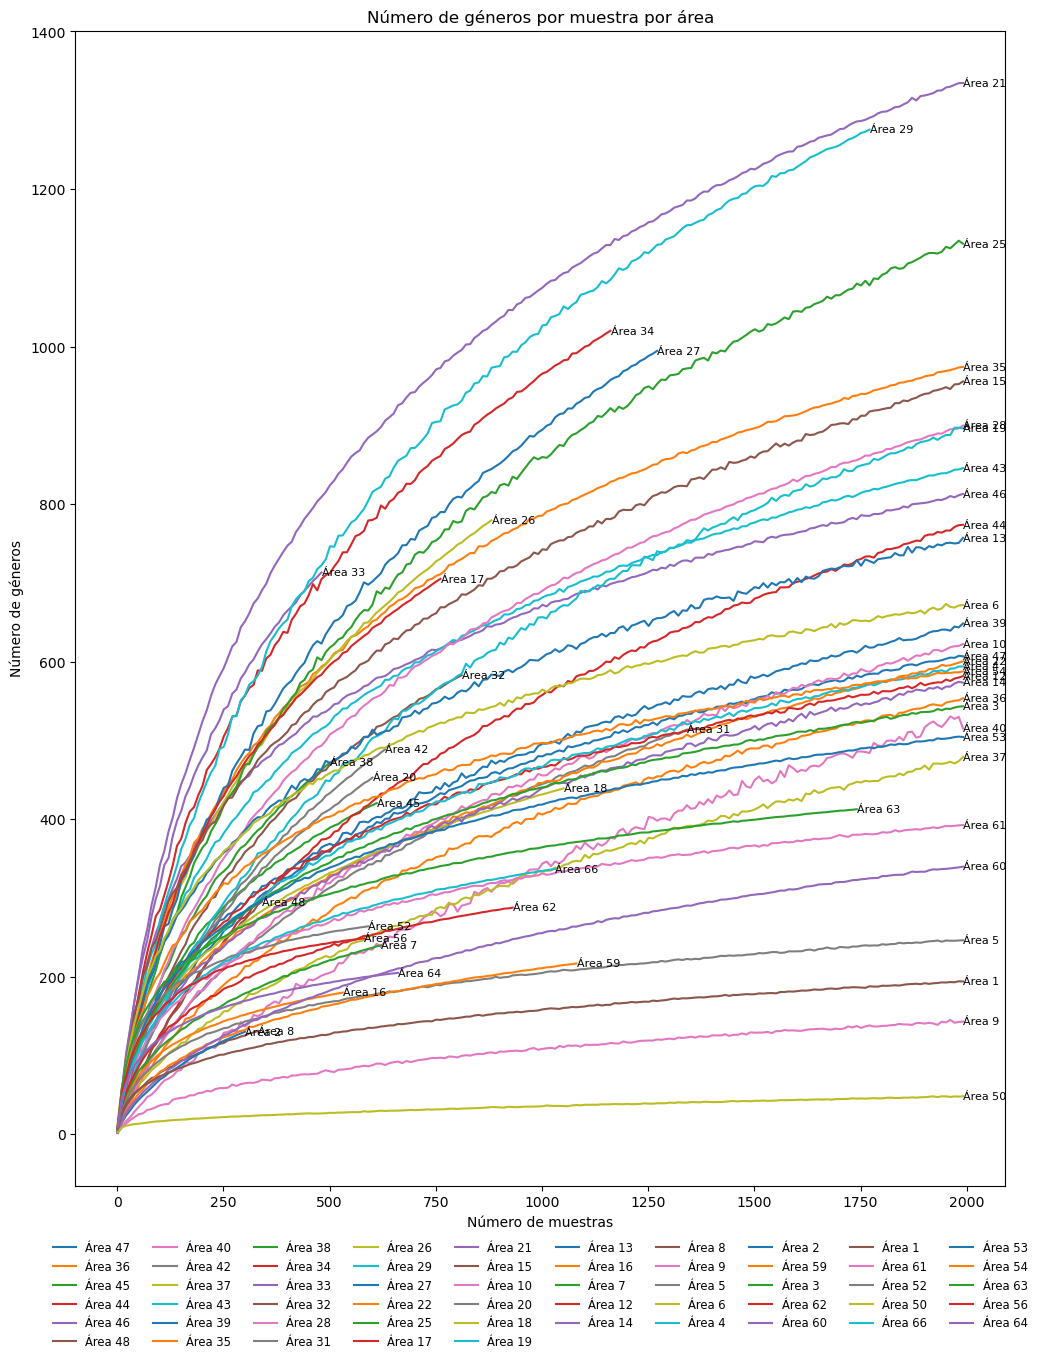

In [ ]:
#We represent the rarefaction curves for each area
plt.figure(figsize=(12, 15))

for k in areas:



    y=mean_generos[int(k)]
    plt.plot(n_muestra[int(k)], y, label=f'Área {int(k)}')
    plt.text(n_muestra[int(k)][-1] + 0.5, y[-1], f'Área {int(k)}', fontsize=8, va='center')


plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=10, fontsize='small', frameon=False)
plt.xlabel('Número de muestras')
plt.ylabel('Número de géneros')
plt.title('Número de géneros por muestra por área')


Now, the objective is to extrapolate the areas to the same number of samples, it is done for 2500 samples.
The extrapolation is done in Matlab  
Then, we are going to represent it. We have to represent three maps, one with the standard deviation of each sample, another map with extrapolation in 2000 and the last one with the extrapolation for 2500 samples

In [37]:
#We load the datafile
df = pd.read_csv("extrapolatedD.xlsx", header=None)

In [40]:
nuevos_nombres = [f"Area{i}" for i in areas]

In [42]:
df.columns = nuevos_nombres

In [50]:
extra2000= df.iloc[1999].tolist()
extra2500= df.iloc[2499].tolist()

In [52]:
len(extra2500)

55

In [13]:
#We have to load the shapefile
shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\nuevas_areas.shp')
shapefile = shapefile.set_crs(epsg=4326)

In [14]:
#We visualize the first rows
shapefile.head(15)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805..."
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ..."
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ..."
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0..."
4,5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ..."
5,6,24.0,Celtic-Biscay Shelf,214.311375,98.762349,"POLYGON ((-5.35678 59.76092, -4.88654 58.61359..."
6,7,50.0,Sea of Japan,89.078279,106.472324,"POLYGON ((142.06265 45.90462, 142.03027 45.815..."
7,8,51.0,Oyashio Current,55.987886,61.256528,"POLYGON ((157.06521 51.14145, 159.02052 50.258..."
8,9,8.0,Scotian Shelf,87.605890,32.828978,"POLYGON ((-55.46172 44.91344, -55.48108 44.866..."
9,10,3.0,California Current,110.244423,215.804744,"POLYGON ((-109.91148 22.87832, -108.75468 21.8..."


In [63]:
#We create new columns in the shapefile for the extrapolated values and the last standard deviation
shapefile['last_std'] = last_std
shapefile['extrapolated_2000'] = extra2000
shapefile['extrapolated_2500'] = extra2500

In [65]:
#We visualize to check if it is done correctly
shapefile.head(15)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry,extrapolated_2000,last_std,extrapolated_2500
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805...",195.82,11.265702,210.24
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ...",422.82,1.455268,484.72
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ...",557.36,23.491560,604.41
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0...",607.43,18.974688,664.15
4,5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ...",251.10,13.433185,268.89
5,6,24.0,Celtic-Biscay Shelf,214.311375,98.762349,"POLYGON ((-5.35678 59.76092, -4.88654 58.61359...",691.64,41.423026,742.95
6,7,50.0,Sea of Japan,89.078279,106.472324,"POLYGON ((142.06265 45.90462, 142.03027 45.815...",405.36,0.660227,446.95
7,8,51.0,Oyashio Current,55.987886,61.256528,"POLYGON ((157.06521 51.14145, 159.02052 50.258...",300.36,1.674507,332.60
8,9,8.0,Scotian Shelf,87.605890,32.828978,"POLYGON ((-55.46172 44.91344, -55.48108 44.866...",145.39,14.534786,160.19
9,10,3.0,California Current,110.244423,215.804744,"POLYGON ((-109.91148 22.87832, -108.75468 21.8...",605.92,26.396286,644.54


Now that we have prepared the shapefile, we can create the maps. We create one for 2000 samples, another for 2500 and the last one for the standard deviation

In [70]:
#To facilitate the visualization, we will round the values to have only two decimal places
shapefile["last_std"] = shapefile["last_std"].round(2)

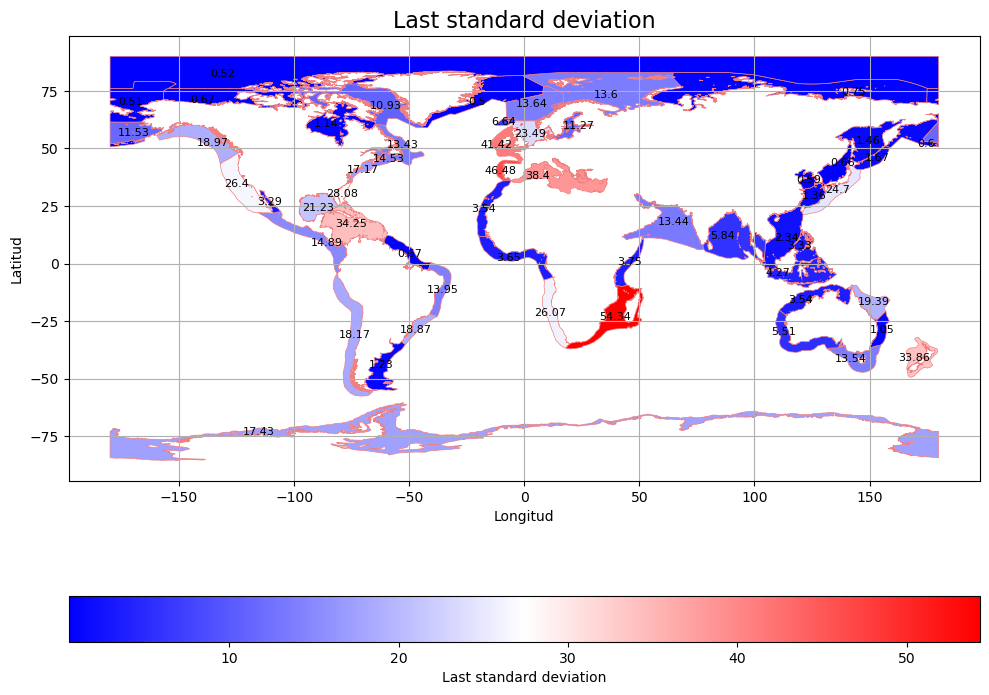

In [71]:
# Crear figura y eje para el mapa
fig, ax = plt.subplots(figsize=(10, 8))



# Colorear las regiones según el valor de 'genusid'
shapefile.plot(column='last_std', ax=ax, legend=True,
              legend_kwds={'label': "Last standard deviation",
                           'orientation': "horizontal"},
              cmap='bwr',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral', linewidth=0.5)

# Agregar etiquetas en puntos representativos dentro de cada polígono
for idx, row in shapefile.iterrows():
    # Obtener un punto representativo dentro del polígono
    representative_point = row.geometry.representative_point()
    
    # Agregar etiqueta en ese punto
    ax.text(representative_point.x, representative_point.y, 
            str(row["last_std"]),  # Aquí estamos usando 'OBJECTID'
            fontsize=8, ha='center', va='center', color='black')

# Título y etiquetas
ax.set_title("Last standard deviation", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
